In [18]:
import statsmodels.formula.api as smf
import statsmodels.api as sm

from keras.models import Sequential
from keras.layers import Dense, Activation
from sklearn.model_selection import train_test_split

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


pd.set_option("display.max_rows", 999)
pd.set_option("display.max_columns", 999)
pd.set_option('display.max_colwidth', -1)

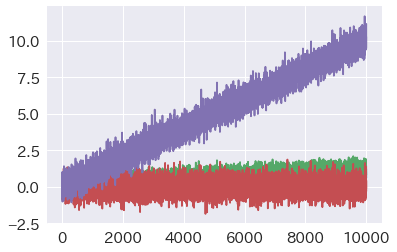

In [2]:
# Make a sample data:
# y is linear with x1, x1 and x2 are colinear, x3 is pure noise

size = 10000
num_features = 3

x1 = np.random.normal(0,0.3,(size,1)) + np.linspace(0,1,size).reshape((size,1))
x2 = np.random.normal(0,0.1,(size,1)) + x1 + 0.2
x3 = np.random.normal(0,0.5,(size,1))

X = np.concatenate((x1,x2,x3), axis=1)
pd.Series(X.T[0]).plot()
pd.Series(X.T[1]).plot()
pd.Series(X.T[2]).plot()

y = np.random.normal(0,0.5,size) + np.linspace(0,10,size)
pd.Series(y).plot()

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, shuffle=True)

train_data = pd.DataFrame(
    np.hstack([X_train, y_train.reshape(y_train.size,1)]),
    columns=['x1', 'x2', 'x3', 'y'])

test_data = pd.DataFrame(
    np.hstack([X_test, y_test.reshape(y_test.size,1)]),
    columns=['x1', 'x2', 'x3', 'y'])

### fit against one explaining feature

In [3]:
ols = smf.ols(formula='y ~ x1', data=train_data)
result = ols.fit()
result.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                  Results: Ordinary least squares
===================================================================
Model:              OLS              Adj. R-squared:     0.468     
Dependent Variable: y                AIC:                30449.8750
Date:               2017-12-28 16:57 BIC:                30463.5823
No. Observations:   7000             Log-Likelihood:     -15223.   
Df Model:           1                F-statistic:        6169.     
Df Residuals:       6998             Prob (F-statistic): 0.00      
R-squared:          0.469            Scale:              4.5350    
---------------------------------------------------------------------
               Coef.    Std.Err.      t      P>|t|    [0.025   0.975]
---------------------------------------------------------------------
Intercept      2.6792     0.0392   68.3961   0.0000   2.6024   2.7559
x1             4.6993     0.0598   78.5399   0.0000   4.5820   4.8166
-------------------------------------------------------------------
Omnibus:              36.320        Durbin-Watson:           2.004 
Prob(Omnibus):        0.000         Jarque-Bera (JB):        26.447
Skew:                 -0.018        Prob(JB):                0.000 
Kurtosis:             2.701         Condition No.:           3     
===================================================================

"""

In [4]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.469
Model:                            OLS   Adj. R-squared:                  0.468
Method:                 Least Squares   F-statistic:                     6169.
Date:                Thu, 28 Dec 2017   Prob (F-statistic):               0.00
Time:                        16:57:17   Log-Likelihood:                -15223.
No. Observations:                7000   AIC:                         3.045e+04
Df Residuals:                    6998   BIC:                         3.046e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.6792      0.039     68.396      0.000       2.602       2.756
x1             4.6993      0.060     78.540      0.000       4.582       4.817
==============================================================================
Omnibus:                       36.320   Durbin-Watson:                   2.004
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               26.447
Skew:                          -0.018   Prob(JB):                     1.81e-06
Kurtosis:                       2.701   Cond. No.                         3.03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

mse 4.533678500855161
qqplot of resid againt normal


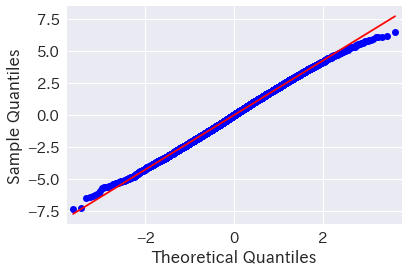

In [5]:
# mean square error
resid = result.resid
print('mse', np.mean(np.square(resid)))

print('qqplot of resid againt normal')
fig = sm.qqplot(resid, line='s')

In [6]:
from io import StringIO

temp = StringIO(result.summary().as_csv())
temp = pd.read_csv(temp, names=list(range(7)))

temp.loc[4,1] = temp.loc[4,2]
temp.loc[4,2] = temp.loc[4,3]
temp.loc[4,3] = temp.loc[4,4]
temp.loc[4,4] = None

summary = pd.DataFrame(
    np.concatenate((temp.loc[1:9,1].values,
                    temp.loc[1:7,3].values,
                    temp.loc[13:16,1].values,
                   )))
summary.index = np.concatenate((temp.loc[1:9,0].values,
                                temp.loc[1:7,2].values,
                                temp.loc[13:16,0].values,
                               ))
summary = summary.T
summary['model_id'] = '0001'
summary.set_index(['model_id'], inplace=True)

coff = pd.DataFrame(temp.iloc[11:-4].values, columns=temp.iloc[10].tolist())
coff['model_id'] = '0001'
coff.set_index(['model_id', coff.columns[0]], inplace=True)

coff

coef      std err       t      P>|t|     [0.025   \
model_id                                                                  
0001     Intercept      2.6792      0.039     68.396   0.000      2.602   
         x1             4.6993      0.060     78.540   0.000      4.582   

                      0.975]   
model_id                       
0001     Intercept      2.756  
         x1             4.817

### Fit against colinear features

In [7]:
result2 = smf.ols(formula='y ~ x1*x2', data=train_data).fit()
result2.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                  Results: Ordinary least squares
===================================================================
Model:              OLS              Adj. R-squared:     0.469     
Dependent Variable: y                AIC:                30448.2841
Date:               2017-12-28 16:57 BIC:                30475.6988
No. Observations:   7000             Log-Likelihood:     -15220.   
Df Model:           3                F-statistic:        2059.     
Df Residuals:       6996             Prob (F-statistic): 0.00      
R-squared:          0.469            Scale:              4.5326    
---------------------------------------------------------------------
              Coef.    Std.Err.      t      P>|t|     [0.025   0.975]
---------------------------------------------------------------------
Intercept     2.5505     0.0673   37.9022   0.0000    2.4186   2.6824
x1            4.1538     0.2718   15.2825   0.0000    3.6210   4.6866
x2            0.6151     0.2603    2.3635   0.0181    0.1049   1.1253
x1:x2        -0.0555     0.1062   -0.5224   0.6014   -0.2637   0.1527
-------------------------------------------------------------------
Omnibus:              35.737        Durbin-Watson:           2.004 
Prob(Omnibus):        0.000         Jarque-Bera (JB):        26.157
Skew:                 -0.021        Prob(JB):                0.000 
Kurtosis:             2.704         Condition No.:           22    
===================================================================

"""

mse 4.530058940739389
qqplot of resid againt normal


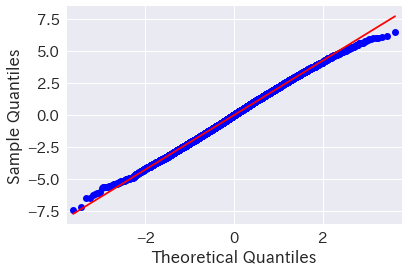

In [8]:
# mean square error
resid = result2.resid
print('mse', np.mean(np.square(resid)))

print('qqplot of resid againt normal')
fig = sm.qqplot(resid, line='s')

### Fig against pure noise

return high p value

In [9]:
result3 = smf.ols(formula='y ~ x3', data=train_data).fit()
result3.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                  Results: Ordinary least squares
===================================================================
Model:              OLS              Adj. R-squared:     -0.000    
Dependent Variable: y                AIC:                34874.0415
Date:               2017-12-28 16:57 BIC:                34887.7488
No. Observations:   7000             Log-Likelihood:     -17435.   
Df Model:           1                F-statistic:        0.2047    
Df Residuals:       6998             Prob (F-statistic): 0.651     
R-squared:          0.000            Scale:              8.5322    
---------------------------------------------------------------------
             Coef.    Std.Err.      t       P>|t|     [0.025   0.975]
---------------------------------------------------------------------
Intercept    5.0177     0.0349   143.7212   0.0000    4.9493   5.0862
x3          -0.0316     0.0699    -0.4524   0.6510   -0.1687   0.1055
-------------------------------------------------------------------
Omnibus:             3305.034       Durbin-Watson:          2.027  
Prob(Omnibus):       0.000          Jarque-Bera (JB):       367.550
Skew:                -0.002         Prob(JB):               0.000  
Kurtosis:            1.877          Condition No.:          2      
===================================================================

"""

mse 8.52972763550008
qqplot of resid againt normal


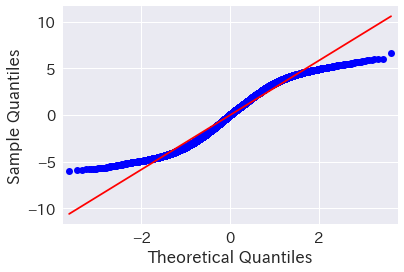

In [10]:
# mean square error
resid = result3.resid
print('mse', np.mean(np.square(resid)))

print('qqplot of resid againt normal')
fig = sm.qqplot(resid, line='s')

In [12]:
model = Sequential()
model.add(Dense(1, input_dim=1, activation='linear'))

model.compile(loss='mse',
              optimizer='rmsprop')
# metrics=['accuracy'] # for classification
    
history = model.fit(X_train.T[0], y_train,
          validation_split=0.2, epochs=50)
# epochs=120
# batch_size=128

score = model.evaluate(X_test.T[0], y_test)
# batch_size=128

score

Train on 5600 samples, validate on 1400 samples
Epoch 1/50
5600/5600 [==============================] - 1s - loss: 26.3920 - val_loss: 25.6731
Epoch 2/50
5600/5600 [==============================] - 0s - loss: 23.9538 - val_loss: 23.2859
Epoch 3/50
5600/5600 [==============================] - 0s - loss: 21.6662 - val_loss: 21.0470
Epoch 4/50
5600/5600 [==============================] - 0s - loss: 19.5259 - val_loss: 18.9515
Epoch 5/50
5600/5600 [==============================] - 0s - loss: 17.5199 - val_loss: 16.9980
Epoch 6/50
5600/5600 [==============================] - 0s - loss: 15.6656 - val_loss: 15.1963
Epoch 7/50
5600/5600 [==============================] - 0s - loss: 13.9621 - val_loss: 13.5418
Epoch 8/50
5600/5600 [==============================] - 0s - loss: 12.3936 - val_loss: 12.0182
Epoch 9/50
5600/5600 [==============================] - 0s - loss: 10.9871 - val_loss: 10.6515
Epoch 10/50
5600/5600 [==============================] - 0s - loss: 9.7075 - val_loss: 9.4288
Epo

4.5079657408396399

In [13]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [14]:
# val_loss is better than train loss?! wtf?
# no worry: train loss use average loss in an epoch
# val loss only use the end of an epoch, which can be better than average.
pd.DataFrame(history.history)

,loss,val_loss
0,26.392013,25.673109
1,23.953750,23.285856
2,21.666155,21.046973
3,19.525887,18.951503
4,17.519894,16.997953
5,15.665567,15.196297
6,13.962097,13.541758
7,12.393594,12.018159
8,10.987057,10.651472
9,9.707539,9.428813


# Apply on house price prediction

In [22]:
data = pd.concat([pd.read_csv('./data/house_train.csv')])
df.head()

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,BsmtFinType1,BsmtFinType2,BsmtFullBath,BsmtHalfBath,BsmtQual,BsmtUnfSF,CentralAir,Condition1,Condition2,Electrical,EnclosedPorch,ExterCond,ExterQual,Exterior1st,Exterior2nd,Fence,FireplaceQu,Fireplaces,Foundation,FullBath,Functional,GarageArea,GarageCars,GarageCond,GarageFinish,GarageQual,GarageType,GarageYrBlt,GrLivArea,HalfBath,Heating,HeatingQC,HouseStyle,Id,KitchenAbvGr,KitchenQual,LandContour,LandSlope,LotArea,LotConfig,LotFrontage,LotShape,LowQualFinSF,MSSubClass,MSZoning,MasVnrArea,MasVnrType,MiscFeature,MiscVal,MoSold,Neighborhood,OpenPorchSF,OverallCond,OverallQual,PavedDrive,PoolArea,PoolQC,RoofMatl,RoofStyle,SaleCondition,SalePrice,SaleType,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
0,856,854,0,NaN,3,1Fam,TA,No,706.0,0.0,GLQ,Unf,1.0,0.0,Gd,150.0,Y,Norm,Norm,SBrkr,0,TA,Gd,VinylSd,VinylSd,NaN,NaN,0,PConc,2,Typ,548.0,2.0,TA,RFn,TA,Attchd,2003.0,1710,1,GasA,Ex,2Story,1,1,Gd,Lvl,Gtl,8450,Inside,65.0,Reg,0,60,RL,196.0,BrkFace,NaN,0,2,CollgCr,61,5,7,Y,0,NaN,CompShg,Gable,Normal,208500.0,WD,0,Pave,8,856.0,AllPub,0,2003,2003,2008
1,1262,0,0,NaN,3,1Fam,TA,Gd,978.0,0.0,ALQ,Unf,0.0,1.0,Gd,284.0,Y,Feedr,Norm,SBrkr,0,TA,TA,MetalSd,MetalSd,NaN,TA,1,CBlock,2,Typ,460.0,2.0,TA,RFn,TA,Attchd,1976.0,1262,0,GasA,Ex,1Story,2,1,TA,Lvl,Gtl,9600,FR2,80.0,Reg,0,20,RL,0.0,None,NaN,0,5,Veenker,0,8,6,Y,0,NaN,CompShg,Gable,Normal,181500.0,WD,0,Pave,6,1262.0,AllPub,298,1976,1976,2007
2,920,866,0,NaN,3,1Fam,TA,Mn,486.0,0.0,GLQ,Unf,1.0,0.0,Gd,434.0,Y,Norm,Norm,SBrkr,0,TA,Gd,VinylSd,VinylSd,NaN,TA,1,PConc,2,Typ,608.0,2.0,TA,RFn,TA,Attchd,2001.0,1786,1,GasA,Ex,2Story,3,1,Gd,Lvl,Gtl,11250,Inside,68.0,IR1,0,60,RL,162.0,BrkFace,NaN,0,9,CollgCr,42,5,7,Y,0,NaN,CompShg,Gable,Normal,223500.0,WD,0,Pave,6,920.0,AllPub,0,2001,2002,2008
3,961,756,0,NaN,3,1Fam,Gd,No,216.0,0.0,ALQ,Unf,1.0,0.0,TA,540.0,Y,Norm,Norm,SBrkr,272,TA,TA,Wd Sdng,Wd Shng,NaN,Gd,1,BrkTil,1,Typ,642.0,3.0,TA,Unf,TA,Detchd,1998.0,1717,0,GasA,Gd,2Story,4,1,Gd,Lvl,Gtl,9550,Corner,60.0,IR1,0,70,RL,0.0,None,NaN,0,2,Crawfor,35,5,7,Y,0,NaN,CompShg,Gable,Abnorml,140000.0,WD,0,Pave,7,756.0,AllPub,0,1915,1970,2006
4,1145,1053,0,NaN,4,1Fam,TA,Av,655.0,0.0,GLQ,Unf,1.0,0.0,Gd,490.0,Y,Norm,Norm,SBrkr,0,TA,Gd,VinylSd,VinylSd,NaN,TA,1,PConc,2,Typ,836.0,3.0,TA,RFn,TA,Attchd,2000.0,2198,1,GasA,Ex,2Story,5,1,Gd,Lvl,Gtl,14260,FR2,84.0,IR1,0,60,RL,350.0,BrkFace,NaN,0,12,NoRidge,84,5,8,Y,0,NaN,CompShg,Gable,Normal,250000.0,WD,0,Pave,9,1145.0,AllPub,192,2000,2000,2008


### Feature selection

- For regression: f_regression, mutual_info_regression  
- For classification: chi2, f_classif, mutual_info_classif

In [47]:
#Univariate feature selection

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

X = df._get_numeric_data().fillna(0)
del X['SalePrice']
y = df.SalePrice.fillna(0)

selector = SelectKBest(chi2, k=10)
selector.fit(X, y)
idx = selector.get_support(indices=True)

X_new = X.iloc[:,idx]


In [48]:
X_new.head()

,2ndFlrSF,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,Id,LotArea,LowQualFinSF,MasVnrArea,MiscVal,PoolArea
0,854,706.0,0.0,150.0,1,8450,0,196.0,0,0
1,0,978.0,0.0,284.0,2,9600,0,0.0,0,0
2,866,486.0,0.0,434.0,3,11250,0,162.0,0,0
3,756,216.0,0.0,540.0,4,9550,0,0.0,0,0
4,1053,655.0,0.0,490.0,5,14260,0,350.0,0,0


In [49]:
X.head()

,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BsmtFinSF1,BsmtFinSF2,BsmtFullBath,BsmtHalfBath,BsmtUnfSF,EnclosedPorch,Fireplaces,FullBath,GarageArea,GarageCars,GarageYrBlt,GrLivArea,HalfBath,Id,KitchenAbvGr,LotArea,LotFrontage,LowQualFinSF,MSSubClass,MasVnrArea,MiscVal,MoSold,OpenPorchSF,OverallCond,OverallQual,PoolArea,ScreenPorch,TotRmsAbvGrd,TotalBsmtSF,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
0,856,854,0,3,706.0,0.0,1.0,0.0,150.0,0,0,2,548.0,2.0,2003.0,1710,1,1,1,8450,65.0,0,60,196.0,0,2,61,5,7,0,0,8,856.0,0,2003,2003,2008
1,1262,0,0,3,978.0,0.0,0.0,1.0,284.0,0,1,2,460.0,2.0,1976.0,1262,0,2,1,9600,80.0,0,20,0.0,0,5,0,8,6,0,0,6,1262.0,298,1976,1976,2007
2,920,866,0,3,486.0,0.0,1.0,0.0,434.0,0,1,2,608.0,2.0,2001.0,1786,1,3,1,11250,68.0,0,60,162.0,0,9,42,5,7,0,0,6,920.0,0,2001,2002,2008
3,961,756,0,3,216.0,0.0,1.0,0.0,540.0,272,1,1,642.0,3.0,1998.0,1717,0,4,1,9550,60.0,0,70,0.0,0,2,35,5,7,0,0,7,756.0,0,1915,1970,2006
4,1145,1053,0,4,655.0,0.0,1.0,0.0,490.0,0,1,2,836.0,3.0,2000.0,2198,1,5,1,14260,84.0,0,60,350.0,0,12,84,5,8,0,0,9,1145.0,192,2000,2000,2008
